9.32. Согласно переписи население Японии менялось следующим образом:
 - 1910 – 49 184 000 человек,
 - 1920 – 55 963 000,
 - 1930 – 64 450 000,
 - 1940 – 71 540 000,
 - 1950 – 82 900 000,
 - 1960 – 94 094 000,
 - 1970 – 104 345 000,
 - 1980 – 116 320 358,
 - 1990 – 123 411 167,
 - 2000 – 127 775 843,
 - 2010 - 128 057 352.

* а) По приведенным данным построить интерполянт в форме Ньютона. Вычислить экстраполированное значение численности населения Японии в 2021 году и сравнить с точным значением 125 502 000 человек. 
* б) По этим же данным построить сплайн-аппроксимацию, экстраполировать данные на 2010 год, сравнить с точным значением. Какие дополнительные условия для построения сплайна нужно поставить в этом случае?
* в) Какой из результатов оказывается более точным?

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import sympy as sp
from scipy.optimize import curve_fit

In [26]:
years = np.array([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2021])
population = np.array([49184000, 55963000, 64450000, 71540000, 82900000, 94094000, 104345000, 116320358, 123411167, 127775843, 128057352])

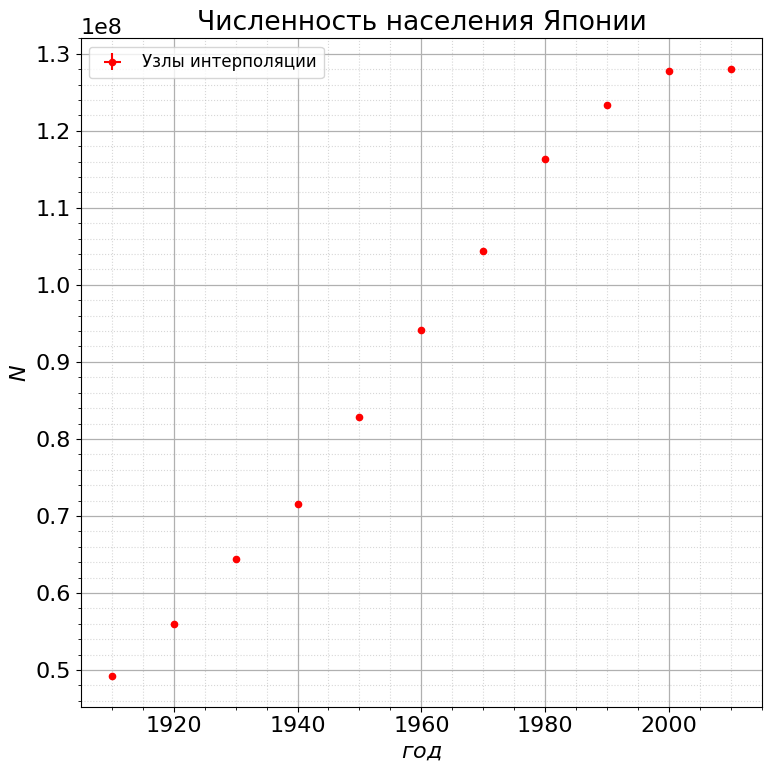

In [27]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта 
plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title(r"Численность населения Японии")
plt.ylabel(r"$N$")
plt.xlabel(r"$год$")

plt.errorbar(years[:-1], population, yerr = 0, xerr = 0, fmt = 'r.', markersize = 9, markerfacecolor = 'r', label = "Узлы интерполяции")

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика
plt.show()

Интерполяция многочленом Ньютона

In [28]:
def N(x: np.array, x0: np.array, b: np.array) -> float:
    n = b.size
    y = 0

    for i in range(n):
        monom = b[i]
        for j in range(i):
            monom *= (x - x0[j])
        y += monom
    
    return y

def SeparatedDifferences(x: np.array, y: np.array) -> np.array :
    sd = np.zeros(shape = (y.size, y.size))

    for i in range(y.size):
        sd[0][i] = y[i]

    for j in range(1, y.size):
        for i in range(y.size - j):
            sd[j][i] = (sd[j - 1][i + 1] - sd[j - 1][i]) / (x[i + j] - x[i])

    return sd

def GetCoeff(sd):
    b = []

    for i in range(sd.shape[0]):
        b.append(sd[i][0])

    return np.array(b)

sd = SeparatedDifferences(years[:-1], population)
b = GetCoeff(sd)

print("Разделенные разности:", sd)
print("Коэффициенты полинома Ньютона:", b)

Разделенные разности: [[ 4.91840000e+07  5.59630000e+07  6.44500000e+07  7.15400000e+07
   8.29000000e+07  9.40940000e+07  1.04345000e+08  1.16320358e+08
   1.23411167e+08  1.27775843e+08  1.28057352e+08]
 [ 6.77900000e+05  8.48700000e+05  7.09000000e+05  1.13600000e+06
   1.11940000e+06  1.02510000e+06  1.19753580e+06  7.09080900e+05
   4.36467600e+05  2.81509000e+04  0.00000000e+00]
 [ 8.54000000e+03 -6.98500000e+03  2.13500000e+04 -8.30000000e+02
  -4.71500000e+03  8.62179000e+03 -2.44227450e+04 -1.36306650e+04
  -2.04158350e+04  0.00000000e+00  0.00000000e+00]
 [-5.17500000e+02  9.44500000e+02 -7.39333333e+02 -1.29500000e+02
   4.44559667e+02 -1.10148450e+03  3.59736000e+02 -2.26172333e+02
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.65500000e+01 -4.20958333e+01  1.52458333e+01  1.43514917e+01
  -3.86511042e+01  3.65305125e+01 -1.46477083e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.57291667e+00  1.14683333e+00 -1.78868333e-02 -1.06005192e+

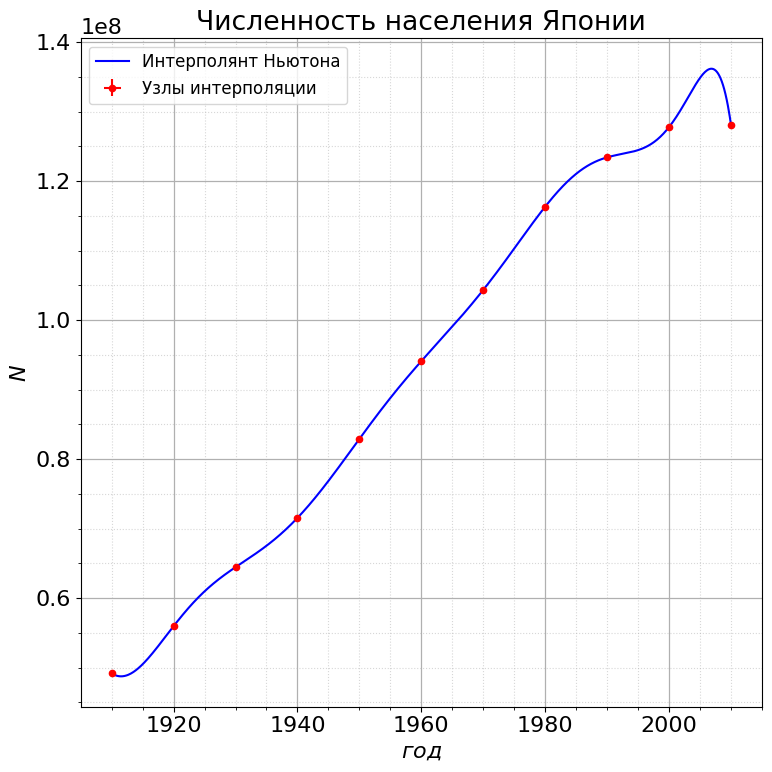

In [29]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта 
plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title(r"Численность населения Японии")
plt.ylabel(r"$N$")
plt.xlabel(r"$год$")

plt.errorbar(years[:-1], population, yerr = 0, xerr = 0, fmt = 'r.', markersize = 9, markerfacecolor = 'r', label = "Узлы интерполяции")

x_lin = np.linspace(years[0], years[-2], 1000)
plt.plot(x_lin, N(x_lin, years[:-1], b), "b", label = "Интерполянт Ньютона")


plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика
plt.show()

Попробуем экстраполировать население в Японии в 2021 году.

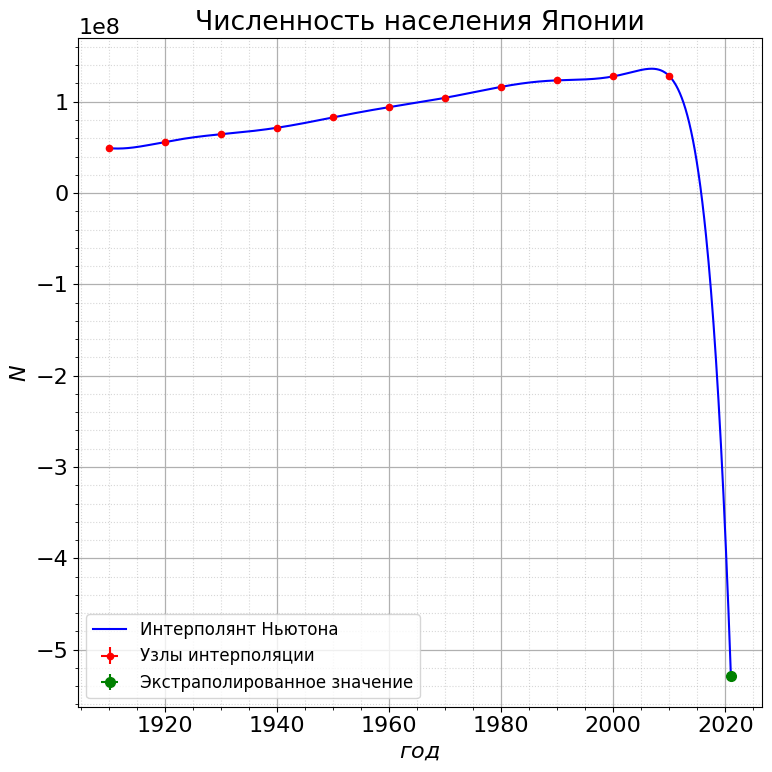

-529269355.9274304


In [30]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта 
plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title(r"Численность населения Японии")
plt.ylabel(r"$N$")
plt.xlabel(r"$год$")

plt.errorbar(years[:-1], population, yerr = 0, xerr = 0, fmt = 'r.', markersize = 9, markerfacecolor = 'r', label = "Узлы интерполяции")
plt.errorbar(years[-1], N(years[-1], years[:-1], b), yerr = 0, xerr = 0, fmt = 'g.', markersize = 14, markerfacecolor = 'g', label = "Экстраполированное значение")

x_lin = np.linspace(years[0], years[-1], 1000)
plt.plot(x_lin, N(x_lin, years[:-1], b), "b", label = "Интерполянт Ньютона")

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика
plt.show()

print(N(years[-1], years[:-1], b))

АХАХАХ))) В общем то, получаем значение $N = - 529,269,355$  

Теперь сделаем интерполяцию сплайнами вида:

$$ S_k(x) = a_k + b_k (x - x_k) + \frac{c_k}{2}(x - x_k)^2 + \frac{d_k}{6}(x - x_k)^2 $$

На эти сплайны наложим следующие условия: 
* Условия интерполяции $S(x_k) = f_k$
* Условия непрерывности $S_k(x_k) = S_{k+1}(x_k)$
* Сшивка $S'_k(x_k) = S'_{k+1}(x_k)$, $S''_k(x_k) = S''_{k+1}(x_k)$
* Свободный сплайн $S''(a) = S''(b) = 0$

Из этих условий получаем: 
$$ a_k = f_k, ~k = 0, ..., n $$
$$ c_0 = c_n = 0 $$
$$ h_k d_k  = c_k - c_{k-1}, ~k = 1, ..., n $$
$$ h_k c_k - \frac{1}{2}h^2_k d_k = b_k - b_{k_1}, ~k = 2, ..., n $$
$$ h_k b_k - \frac{1}{2}h^2_k c_k + \frac{h^3_k}{6}d_k = f_k - f_{k-1}, ~k = 1, ..., n; ~h_k = x_k - x_{k - 1} $$

Исключаем $d_k$, $b_k$:

$$ h_k c_{k-1} + 2 (h_k + h_{k + 1})c_k + h_{k + 1}c_{k+1} = 6 \left(\frac{f_{k + 1} - f_k}{h_{k+1}} - \frac{f_k - f_{k-1}}{h_k} \right), c_0 = c_n = 0, ~k = 1, ..., (n - 1) $$

Решив систему, определяются $d_k$, $b_k$: 
$$ d_k = h_k^{-1} (c_k - c_{k-1}), b_k = \frac{1}{2}h_k c_k - \frac{1}{6}h_k^2 d_k + \frac{f_k - f_{k-1}}{h_k}$$

In [31]:
def Spline(x: np.array, f: np.array) -> np.array:
    n = x.size - 1
    
    sp = np.zeros(shape = (n + 1, 4))
    h = np.zeros(n + 1)

    for k in range(1, n + 1):
        sp[k][0] = f[k]
        h[k] = x[k] - x[k - 1]

    a = np.zeros(n - 1)
    b = np.zeros(n - 1)
    c = np.zeros(n - 1)
    F = np.zeros(n - 1)

    for k in range(1, n):
        a[k - 1] = h[k]
        b[k - 1] = 2 * (h[k] + h[k + 1])
        c[k - 1] = h[k + 1]
        F[k - 1] = 6 * ((f[k + 1] - f[k])  / h[k + 1] - (f[k] - f[k - 1]) / h[k])
    
    a[0]  = 0
    c[-1] = 0

    res = TridiagonalRun(a, b, c, F)

    for k in range(1, n):
        sp[k][2] = res[k - 1]
    sp[-1][2] = 0

    for k in range(1, n + 1):
        sp[k][3] = 2 * (sp[k][2] - sp[k - 1][2]) / h[k]
        sp[k][1] = 1 / 2 * h[k] * sp[k][2] - 1 / 6 * h[k] ** 2 * sp[k][3] + (f[k] - f[k - 1]) / h[k]

    return sp

def TridiagonalRun(a: np.array, b: np.array, c: np.array, f: np.array) -> np.array:
    n = f.size
   
    p = np.zeros(n)
    r = np.zeros(n)

    p[0] = c[0] / b[0]
    r[0] = f[0] / b[0]

    for k in range(1, n):
        p[k] = c[k] / (b[k] - a[k] * p[k - 1])
        r[k] = (f[k] - a[k] * r[k - 1]) / (b[k] - a[k] * p[k - 1])

    x = np.zeros(n)

    x[n - 1] = r[n - 1]

    for k in range(n - 2, -1, -1):
        x[k] = r[k] - p[k] * x[k + 1]

    return x

def GetValue(sp: np.array, x, x_0: np.array):
    if (x <= x_0[0]):
        return sp[1][0] + sp[1][1] * (x - x_0[1]) + sp[1][2] / 2 * (x - x_0[1]) ** 2 + sp[1][3] / 6 * (x - x_0[1]) ** 3 
    if (x > x_0[-1]):
        return sp[-1][0] + sp[-1][1] * (x - x_0[-1]) + sp[-1][2] / 2 * (x - x_0[-1]) ** 2 + sp[-1][3] / 6 * (x - x_0[-1]) ** 3 

    for i in range(x_0.size):
        if (x_0[i] < x and x <= x_0[i + 1]):
            return sp[i + 1][0] + sp[i + 1][1] * (x - x_0[i + 1]) + sp[i + 1][2] / 2 * (x - x_0[i + 1]) ** 2 + sp[i + 1][3] / 6 * (x - x_0[i + 1]) ** 3 


sp = Spline(years[:-1], population)

128829926.83648182


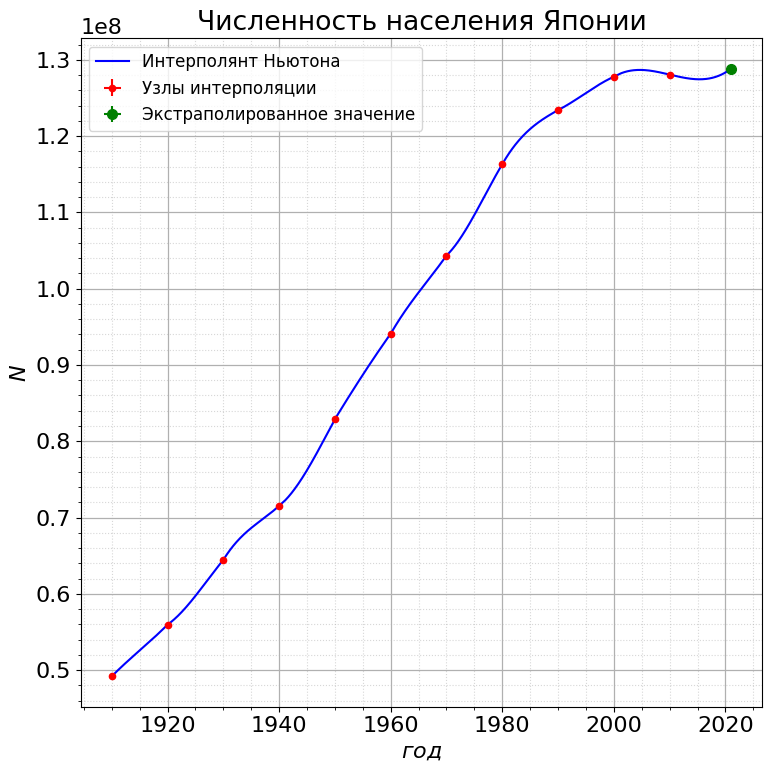

In [32]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта 
plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title(r"Численность населения Японии")
plt.ylabel(r"$N$")
plt.xlabel(r"$год$")

plt.errorbar(years[:-1], population, yerr = 0, xerr = 0, fmt = 'r.', markersize = 9, markerfacecolor = 'r', label = "Узлы интерполяции")

x_lin = np.linspace(years[0], years[-1], 1000)
plt.plot(x_lin, [GetValue(sp, x_lin[i], years[:-1]) for i in range(x_lin.size)], "b", label = "Интерполянт Ньютона")

plt.errorbar(years[-1], GetValue(sp, years[-1], years[:-1]), yerr = 0, xerr = 0, fmt = 'g.', markersize = 14, markerfacecolor = 'g', label = "Экстраполированное значение")
print(GetValue(sp, years[-1], years[:-1]))

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика
plt.show()

Значение численности населения Японии в 2021, полученное с помощью сплайнов равно 126,056,031. Истинное значение - 125,502,000. Относительная погрешность - 0.44%